# Sentiment Analysis with TextBlob and Vader

## Imports

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import nltk
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# ran this to install
# nltk.download('vader_lexicon')


# to install textblob on windows, search and open "Anaconda Prompt"
# run the following command within the anaconda prompt:
# conda install -c conda-forge textblob


## Create dictionaries from JSON File

In [103]:
coronavirus_tweets_plots      = []
non_coronavirus_tweets_plots  = []

corpus_tweets = []

with open('coronavirus_tweets_with_tone.json', encoding="utf8") as f:
  coronavirus_tweets_plots = json.load(f)

with open('non_coronavirus_tweets_with_tone.json', encoding="utf8") as f:
  non_coronavirus_tweets_plots = json.load(f)


with open('corpus_coronavirus_tweets_with_tone.json', encoding="utf8") as f:
  temp_corpus_coronavirus_tweets = json.load(f)
  temp_corpus_coronavirus_tweets['description'] = 'Corpus Coronavirus Tweets'

with open('corpus_non_coronavirus_tweets_with_tone.json', encoding="utf8") as f:
  temp_corpus_non_coronavirus_tweets = json.load(f)
  temp_corpus_non_coronavirus_tweets['description'] = 'Corpus Non-Coronavirus Tweets'

corpus_tweets.append(temp_corpus_coronavirus_tweets)
corpus_tweets.append(temp_corpus_non_coronavirus_tweets)
    
print(f'coronavirus tweets count: {len(coronavirus_tweets_plots)}')
print(f'non-coronavirus tweets count: {len(non_coronavirus_tweets_plots)}')

print(f'Corpus tweets count: {len(corpus_tweets)}')

coronavirus tweets count: 200
non-coronavirus tweets count: 200
Corpus tweets count: 2


## Dataframe Setup
Initializes the dataframes, as well as adds the VADAR polarity ratings

Dataframes include the following columns:
* **id_str**: the tweet's id on twitter
*  **created_at**: timestamp
* **text**: the tweet text
* **anger**: IBM Watson Ton Analyzer score for anger,  (placeholder value 0.0 if score was below .5)
* **analytical**: IBM Watson Ton Analyzer score for analytical (placeholder value 0.0 if score was below .5)
* **confident**: IBM Watson Ton Analyzer score for confident (placeholder value 0.0 if score was below .5)
* **fear**: IBM Watson Ton Analyzer score for fear (placeholder value 0.0 if score was below .5)
* **joy**: IBM Watson Ton Analyzer score for joy (placeholder value 0.0 if score was below .5)
* **sadness**: IBM Watson Ton Analyzer score for sadness (placeholder value 0.0 if score was below .5)
* **tentative**: IBM Watson Ton Analyzer score for tentative (placeholder value 0.0 if score was below .5)
* **vader_polarity**: Ranges from -1 - 1, where -1 is negative and 1 is positive



In [104]:
# Initialize VADER
sid        = SentimentIntensityAnalyzer()
vader_sent = lambda x: sid.polarity_scores(x)['compound']

# Create scatterplot dataframes
pd.set_option('max_colwidth', 300)
coronavirus_tweets_plot_df     = pd.DataFrame.from_dict(coronavirus_tweets_plots)
non_coronavirus_tweets_plot_df = pd.DataFrame.from_dict(non_coronavirus_tweets_plots)

# Add VADER polarity scores for scatterplot dataframes
coronavirus_tweets_plot_df['vader_polarity']     = coronavirus_tweets_plot_df['text'].apply(vader_sent)
non_coronavirus_tweets_plot_df['vader_polarity'] = non_coronavirus_tweets_plot_df['text'].apply(vader_sent)

# Create corpus dataframes
pd.set_option('max_colwidth', 300)
corpus_tweets_df = pd.DataFrame.from_dict(corpus_tweets)

# Add VADER polarity scores for corpus dataframes
corpus_tweets_df['vader_polarity'] = corpus_tweets_df['text'].apply(vader_sent)


## Scatterplots - Vader And IBM Watson Tone Analyzer

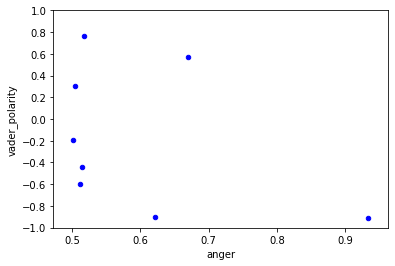

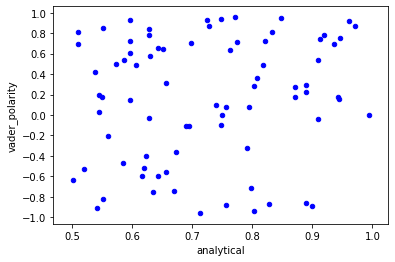

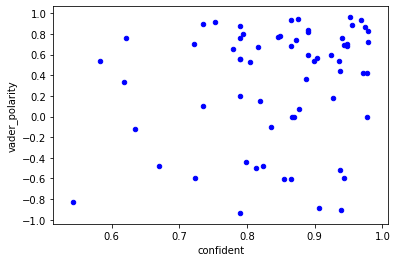

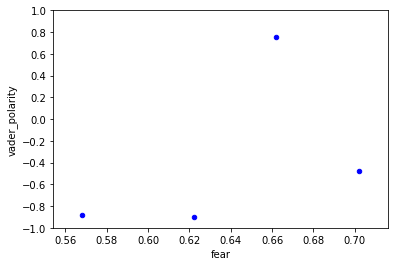

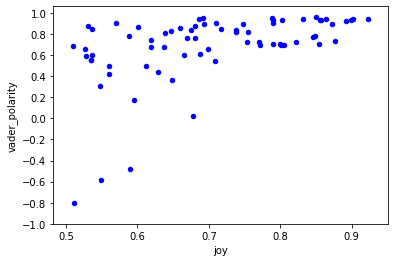

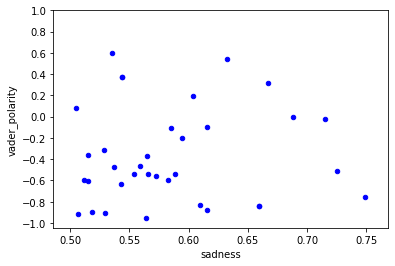

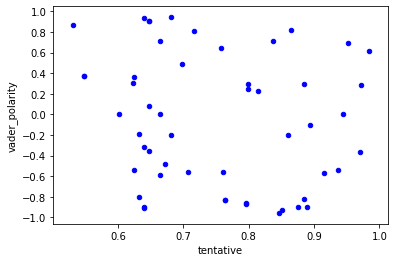

In [105]:
# coronavirus related

# anger
anger_coronavirus_df = coronavirus_tweets_plot_df.copy()
anger_coronavirus_df = anger_coronavirus_df[anger_coronavirus_df.anger != 0.0]

# analytical
analytical_coronavirus_df = coronavirus_tweets_plot_df.copy()
analytical_coronavirus_df = analytical_coronavirus_df[analytical_coronavirus_df.analytical != 0.0]

# confident
confident_coronavirus_df = coronavirus_tweets_plot_df.copy()
confident_coronavirus_df = confident_coronavirus_df[confident_coronavirus_df.confident != 0.0]

# fear
fear_coronavirus_df = coronavirus_tweets_plot_df.copy()
fear_coronavirus_df = fear_coronavirus_df[fear_coronavirus_df.fear != 0.0]

# joy
joy_coronavirus_df = coronavirus_tweets_plot_df.copy()
joy_coronavirus_df = joy_coronavirus_df[joy_coronavirus_df.joy != 0.0]

# sadness
sadness_coronavirus_df = coronavirus_tweets_plot_df.copy()
sadness_coronavirus_df = sadness_coronavirus_df[sadness_coronavirus_df.sadness != 0.0]

# tentative
tentative_coronavirus_df = coronavirus_tweets_plot_df.copy()
tentative_coronavirus_df = tentative_coronavirus_df[tentative_coronavirus_df.tentative != 0.0]

anger_coronavirus_df.plot(kind='scatter',x='anger',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

analytical_coronavirus_df.plot(kind='scatter',x='analytical',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

confident_coronavirus_df.plot(kind='scatter',x='confident',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

fear_coronavirus_df.plot(kind='scatter',x='fear',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

joy_coronavirus_df.plot(kind='scatter',x='joy',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

sadness_coronavirus_df.plot(kind='scatter',x='sadness',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

tentative_coronavirus_df.plot(kind='scatter',x='tentative',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

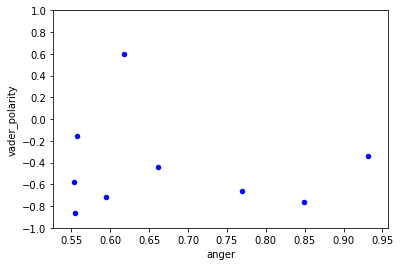

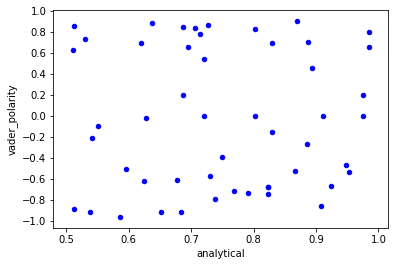

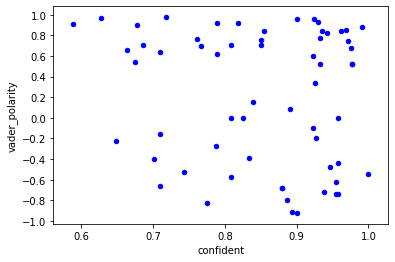

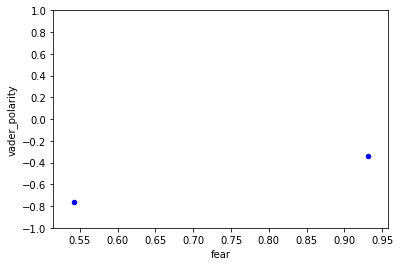

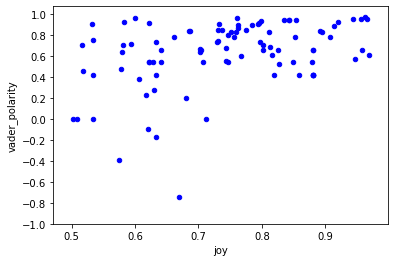

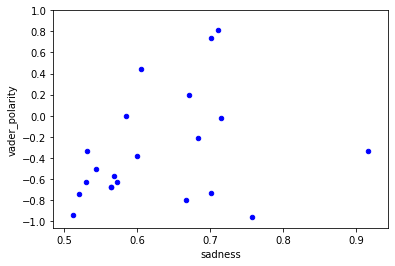

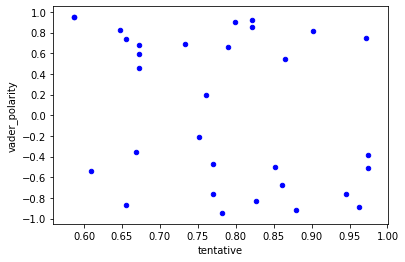

In [106]:
# Non-Coronavirus related tweets

# anger
anger_non_coronavirus_df = non_coronavirus_tweets_plot_df.copy()
anger_non_coronavirus_df = anger_non_coronavirus_df[anger_non_coronavirus_df.anger != 0.0]

# analytical
analytical_non_coronavirus_df = non_coronavirus_tweets_plot_df.copy()
analytical_non_coronavirus_df = analytical_non_coronavirus_df[analytical_non_coronavirus_df.analytical != 0.0]

# confident
confident_non_coronavirus_df = non_coronavirus_tweets_plot_df.copy()
confident_non_coronavirus_df = confident_non_coronavirus_df[confident_non_coronavirus_df.confident != 0.0]

# fear
fear_non_coronavirus_df = non_coronavirus_tweets_plot_df.copy()
fear_non_coronavirus_df = fear_non_coronavirus_df[fear_non_coronavirus_df.fear != 0.0]

# joy
joy_non_coronavirus_df = non_coronavirus_tweets_plot_df.copy()
joy_non_coronavirus_df = joy_non_coronavirus_df[joy_non_coronavirus_df.joy != 0.0]

# sadness
sadness_non_coronavirus_df = non_coronavirus_tweets_plot_df.copy()
sadness_non_coronavirus_df = sadness_non_coronavirus_df[sadness_non_coronavirus_df.sadness != 0.0]

# tentative
tentative_non_coronavirus_df = non_coronavirus_tweets_plot_df.copy()
tentative_non_coronavirus_df = tentative_non_coronavirus_df[tentative_non_coronavirus_df.tentative != 0.0]

anger_non_coronavirus_df.plot(kind='scatter',x='anger',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

analytical_non_coronavirus_df.plot(kind='scatter',x='analytical',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

confident_non_coronavirus_df.plot(kind='scatter',x='confident',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

fear_non_coronavirus_df.plot(kind='scatter',x='fear',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

joy_non_coronavirus_df.plot(kind='scatter',x='joy',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

sadness_non_coronavirus_df.plot(kind='scatter',x='sadness',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

tentative_non_coronavirus_df.plot(kind='scatter',x='tentative',y='vader_polarity',color='blue', yticks=[-1.0, -0.8, -0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

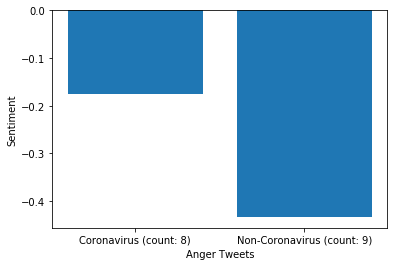

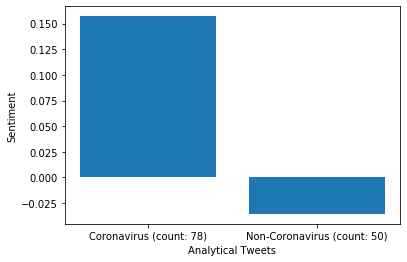

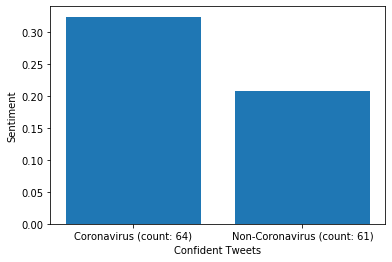

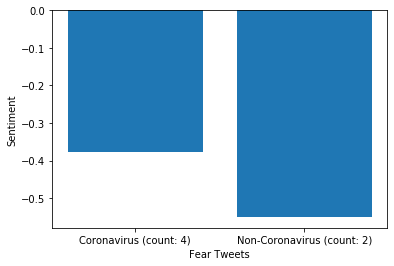

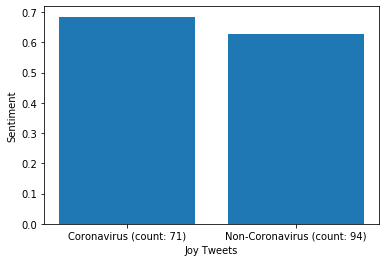

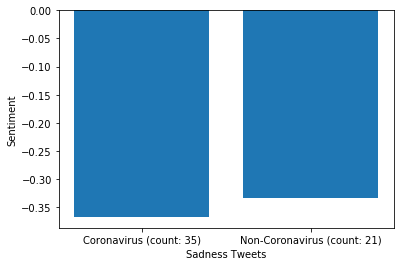

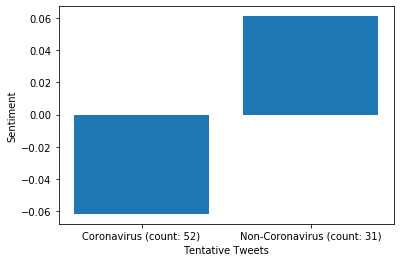

In [107]:
x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, [anger_coronavirus_df['vader_polarity'].mean(), anger_non_coronavirus_df['vader_polarity'].mean()])
coronavirus_anger_label = f'Coronavirus (count: {len(anger_coronavirus_df)})'
non_coronavirus_anger_label = f'Non-Coronavirus (count: {len(anger_non_coronavirus_df)})'
plt.xticks(x, (coronavirus_anger_label, non_coronavirus_anger_label))
plt.ylabel('Sentiment')
plt.xlabel('Anger Tweets')
plt.show()

x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, [analytical_coronavirus_df['vader_polarity'].mean(), analytical_non_coronavirus_df['vader_polarity'].mean()])
coronavirus_analytical_label = f'Coronavirus (count: {len(analytical_coronavirus_df)})'
non_coronavirus_analytical_label = f'Non-Coronavirus (count: {len(analytical_non_coronavirus_df)})'
plt.xticks(x, (coronavirus_analytical_label, non_coronavirus_analytical_label))
plt.ylabel('Sentiment')
plt.xlabel('Analytical Tweets')
plt.show()

x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, [confident_coronavirus_df['vader_polarity'].mean(), confident_non_coronavirus_df['vader_polarity'].mean()])
coronavirus_confident_label = f'Coronavirus (count: {len(confident_coronavirus_df)})'
non_coronavirus_confident_label = f'Non-Coronavirus (count: {len(confident_non_coronavirus_df)})'
plt.xticks(x, (coronavirus_confident_label, non_coronavirus_confident_label))
plt.ylabel('Sentiment')
plt.xlabel('Confident Tweets')
plt.show()

x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, [fear_coronavirus_df['vader_polarity'].mean(), fear_non_coronavirus_df['vader_polarity'].mean()])
coronavirus_fear_label = f'Coronavirus (count: {len(fear_coronavirus_df)})'
non_coronavirus_fear_label = f'Non-Coronavirus (count: {len(fear_non_coronavirus_df)})'
plt.xticks(x, (coronavirus_fear_label, non_coronavirus_fear_label))
plt.ylabel('Sentiment')
plt.xlabel('Fear Tweets')
plt.show()

x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, [joy_coronavirus_df['vader_polarity'].mean(), joy_non_coronavirus_df['vader_polarity'].mean()])
coronavirus_joy_label = f'Coronavirus (count: {len(joy_coronavirus_df)})'
non_coronavirus_joy_label = f'Non-Coronavirus (count: {len(joy_non_coronavirus_df)})'
plt.xticks(x, (coronavirus_joy_label, non_coronavirus_joy_label))
plt.ylabel('Sentiment')
plt.xlabel('Joy Tweets')
plt.show()

x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, [sadness_coronavirus_df['vader_polarity'].mean(), sadness_non_coronavirus_df['vader_polarity'].mean()])
coronavirus_sadness_label = f'Coronavirus (count: {len(sadness_coronavirus_df)})'
non_coronavirus_sadness_label = f'Non-Coronavirus (count: {len(sadness_non_coronavirus_df)})'
plt.xticks(x, (coronavirus_sadness_label, non_coronavirus_sadness_label))
plt.ylabel('Sentiment')
plt.xlabel('Sadness Tweets')
plt.show()

x = np.arange(2)
fig, ax = plt.subplots()
plt.bar(x, [tentative_coronavirus_df['vader_polarity'].mean(), tentative_non_coronavirus_df['vader_polarity'].mean()])
coronavirus_tentative_label = f'Coronavirus (count: {len(tentative_coronavirus_df)})'
non_coronavirus_tentative_label = f'Non-Coronavirus (count: {len(tentative_non_coronavirus_df)})'
plt.xticks(x, (coronavirus_tentative_label, non_coronavirus_tentative_label))
plt.ylabel('Sentiment')
plt.xlabel('Tentative Tweets')
plt.show()

## Corpus Coronavirus Tweets

In [108]:
corpus_tweets_df

,text,analytical,anger,confident,fear,joy,sadness,tentative,description,vader_polarity
0,"China has been working very hard to contain the Coronavirus. The United States greatly appreciates their efforts and transparency. It will all work out well. In particular, on behalf of the American People, I want to thank President Xi! We are in very close communication with China concerning t...",0.0,0.0,0.0,0.0,0.600239,0.514898,0.0,Corpus Coronavirus Tweets,0.9999
1,"Wonderful account of U.S. Embassy (Iraq) vs. the Benghazi disaster! https://t.co/qDQtgkjr1S General Qassem Soleimani has killed or badly wounded thousands of Americans over an extended period of time, and was plotting to kill many more...but got caught! He was directly and indirectly responsibl...",0.0,0.0,0.0,0.0,0.606194,0.514669,0.0,Corpus Non-Coronavirus Tweets,1.0000


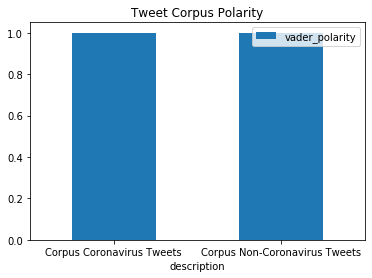

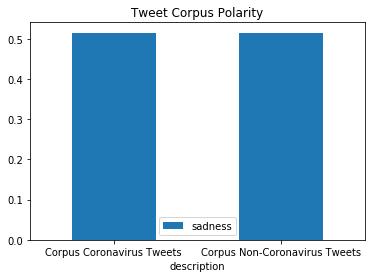

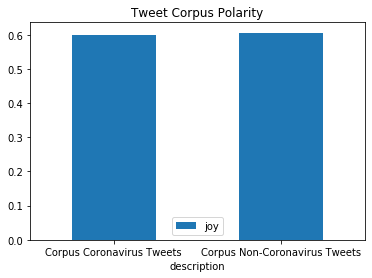

In [109]:
corpus_tweets_df.plot(kind='bar',x='description',y='vader_polarity',title='Tweet Corpus Polarity', rot=0)
plt.show()

corpus_tweets_df.plot(kind='bar',x='description',y='sadness',title='Tweet Corpus Polarity', rot=0)
plt.show()

corpus_tweets_df.plot(kind='bar',x='description',y='joy',title='Tweet Corpus Polarity', rot=0)
plt.show()